# Mini Projeto 1

## William Palmieri

### A variável será: Horas de aula no Ensino Médio nas escolas da Região Sudeste

In [306]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import math
import scipy 

In [307]:
print('Esperam-se trabalhar no diretório')
print(os.getcwd())

Esperam-se trabalhar no diretório
C:\Users\1234\Desktop\Insper\2° Semestre\Ciência dos dados\GitHubFake\CD\mini projeto 1


In [308]:
notas = pd.read_excel("PlanilhaHA.xls", sep="")

Primeiro, criamos uma tabela com a quantidade de horas de aula durante o ensino médio de cada escola da região Sudeste

In [309]:
tab = pd.DataFrame()

tab["Escola"] = notas.Escola
tab["med"] = notas.Med

tab

,Escola,med
0,31200263,0.0
1,31200271,4.5
2,31200778,0.0
3,31200794,0.0
4,31271870,0.0
5,31313262,0.0
6,31313271,0.0
7,31031771,0.0
8,31031780,0.0
9,31031810,0.0


Como há muitas escolas que não possuem ensino médio, iremos fazer uma filtragem para retirá-las.

In [310]:
Med = notas[notas.Med != 0].Med

Feita a filtragem, plotaremos um histograma com os dados e iremos analisar.

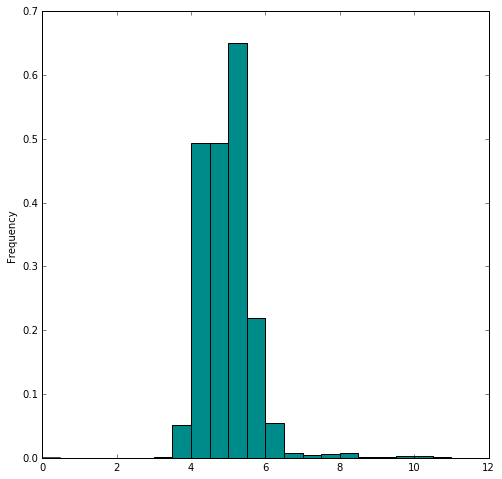

In [311]:
faixa = np.arange(0,12,0.5)
Med.plot.hist(bins=faixa, normed= True, color="darkcyan", figsize = (8, 8))


Usando o método empírico, chegamos a conclusão de que o gráfico de distribuição de frequência fica entre uma normal com assimetria, pois seu pico está muito próximo do meio do gráfico mas não exatamente nele, e  entre uma Cauchy, por conter pequenos valores nas extremidades.

Para termos certeza da simetria, precisamos considerar a Moda, a Mediana e a Média.

In [323]:
Med.mode()

0    5.3
dtype: float64

In [315]:
Med.median() 

4.9

In [316]:
Med.mean()

4.9275578855397555

Como a Moda > Mediana > Média, temos que a distribuição tem uma pequena assimetria negativa.

# Tópicos 5 - 6

Considerando a curva como uma Gaussiana, iremos estimar os parâmetros necessários dessa família, que são a Média e Desvio Padrão. Assim, estimarei os parâmetros.

In [317]:
M = 5.0              #(Média)
desvpad = 0.69       #Desvio Padrão

Além disso, a outra curva escolhida foi a Cauchy, que tem como parâmetros alfa e beta, onde alfa é um parâmetro de locação e beta um parâmetro de escala. Os parâmeros dela também serão estimados.

In [362]:
alfa = 5
beta = 0.48

Plotando o gráfico com as curvas feitas a partido dos parâmetros estimados, temos:

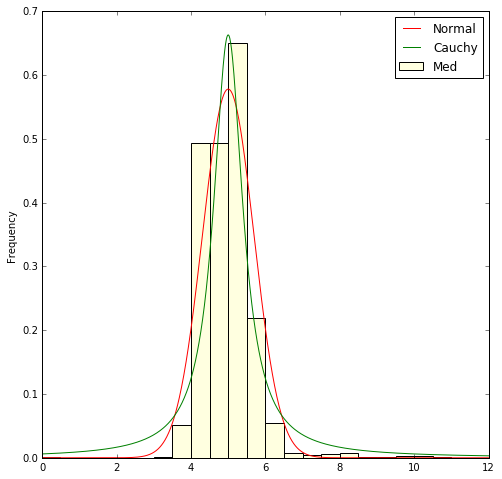

In [374]:
t = np.linspace(0,12,1000)
Med.plot.hist(bins=faixa, normed= True, color="lightyellow", figsize = (8, 8))
plt.plot(t, stats.norm.pdf(t, loc = M, scale = desvpad), color = "red", label = "Normal")
plt.plot(t, stats.cauchy.pdf(t, loc=alfa, scale=beta), color = "green", label = "Cauchy")
plt.legend()

Agora, iremos usar a função "Fit" para descobrir os valores reais dos parâmetros.

In [357]:
print ("Dados estimados para a normal: ", M,",", desvpad)
print ("Dados reais da normal", stats.norm.fit(Med))

Dados estimados para a normal:  5.0 , 0.69
Dados reais da normal (4.9275578855395361, 0.76531220656467513)


In [359]:
print ("Dados estimados para a Cauchy: ", alfa,",", beta)
print ("Dados reais da normal", stats.cauchy.fit(Med))

Dados estimados para a Cauchy:  5 , 0.48
Dados reais da normal (4.8992547037260366, 0.41626780421138376)


Em seguida, plotaremos o gráfico com os aparâmetros obtidos:

In [375]:
Mo = 4.9275578855395361
desvpado = 0.76531220656467513
alfao = 4.8992547037260366
betao = 0.41626780421138376

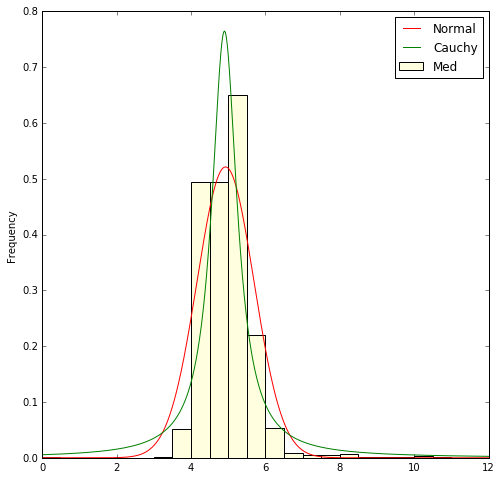

In [376]:
Med.plot.hist(bins=faixa, normed= True, color="lightyellow", figsize = (8, 8))
plt.plot(t, stats.norm.pdf(t, loc = Mo, scale = desvpado), color = "red", label = "Normal")
plt.plot(t, stats.cauchy.pdf(t, loc=alfao, scale=betao), color = "green", label = "Cauchy")
plt.legend()

Se compararmos as curvas, percebemos que, tanto para a curva Cauchy quanto para a Normal, os parâmetros estimados se enquadram melhor. Isso pode significar que essas curvas escolhidas não são as melhores para o gráfico obtido. Entretanto, como a diferença é pequena, pode-se asumir que as curvas estão certas e que a diferença existe pois os valores são experimentais e naturalmente irão diferir dos valores teóricos.